In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import re
import json
import pickle as pkl
from collections import Counter

import statistics as s
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


In [3]:
#import pre-processed data
fc_IC_regression = pd.read_csv('fc_IC_regression.csv')
fc_accent_regression = pd.read_csv('fc_accent_regression.csv')

In [4]:
#temporarily making a dummy musician
fc_accent_regression[(fc_accent_regression['subject'] == 'a237ah') | (fc_accent_regression['subject'] == 'yb48ry') ]['musician'] = 1
fc_IC_regression[(fc_IC_regression['subject'] == 'a237ah') | (fc_IC_regression['subject'] == 'yb48ry')]['musician'] = 1


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_85632/2979966945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_accent_regression[(fc_accent_regression['subject'] == 'a237ah') | (fc_accent_regression['subject'] == 'yb48ry') ]['musician'] = 1
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_85632/2979966945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_IC_regression[(fc_IC_regression['subject'] == 'a237ah') | (fc_IC_regression['subject'] == 'yb48ry')]['musician'] = 1


### Mixed effects model for accent forced choice

In [5]:
#considering only the effects of IC and contour
md_accent = smf.mixedlm("accent_chosen ~ IC + C(contour)", fc_accent_regression, groups=fc_accent_regression['subject'])
mdf_accent = md_accent.fit(method=["lbfgs"])
print(mdf_accent.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  accent_chosen
No. Observations:  64       Method:              REML         
No. Groups:        4        Scale:               0.1898       
Min. group size:   16       Log-Likelihood:      -43.4516     
Max. group size:   16       Converged:           Yes          
Mean group size:   16.0                                       
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.594    0.186  3.189 0.001  0.229  0.959
C(contour)[T.asc]   -0.094    0.218 -0.430 0.667 -0.521  0.333
C(contour)[T.des]   -0.010    0.199 -0.052 0.958 -0.400  0.379
C(contour)[T.inv-U] -0.016    0.133 -0.117 0.907 -0.277  0.246
IC                   0.195    0.149  1.310 0.190 -0.097  0.488
Group Var            0.044    0.107                           



/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


In [6]:
#considering the effects of IC, contour, musicianship, and interaction between musicianship and contour
md_accent = smf.mixedlm("accent_chosen ~ IC + C(musician) + C(contour) + IC:C(musician)", fc_accent_regression, groups=fc_accent_regression['subject'])
mdf_accent = md_accent.fit(method=["lbfgs"])
print(mdf_accent.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  accent_chosen
No. Observations:  64       Method:              REML         
No. Groups:        4        Scale:               0.1898       
Min. group size:   16       Log-Likelihood:      -43.4516     
Max. group size:   16       Converged:           Yes          
Mean group size:   16.0                                       
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.594    0.186  3.189 0.001  0.229  0.959
C(contour)[T.asc]   -0.094    0.218 -0.430 0.667 -0.521  0.333
C(contour)[T.des]   -0.010    0.199 -0.052 0.958 -0.400  0.379
C(contour)[T.inv-U] -0.016    0.133 -0.117 0.907 -0.277  0.246
IC                   0.195    0.149  1.310 0.190 -0.097  0.488
Group Var            0.044    0.107                           



/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_85632/1085114866.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predictor', y='Coefficient', data=data, palette="Blues_d")


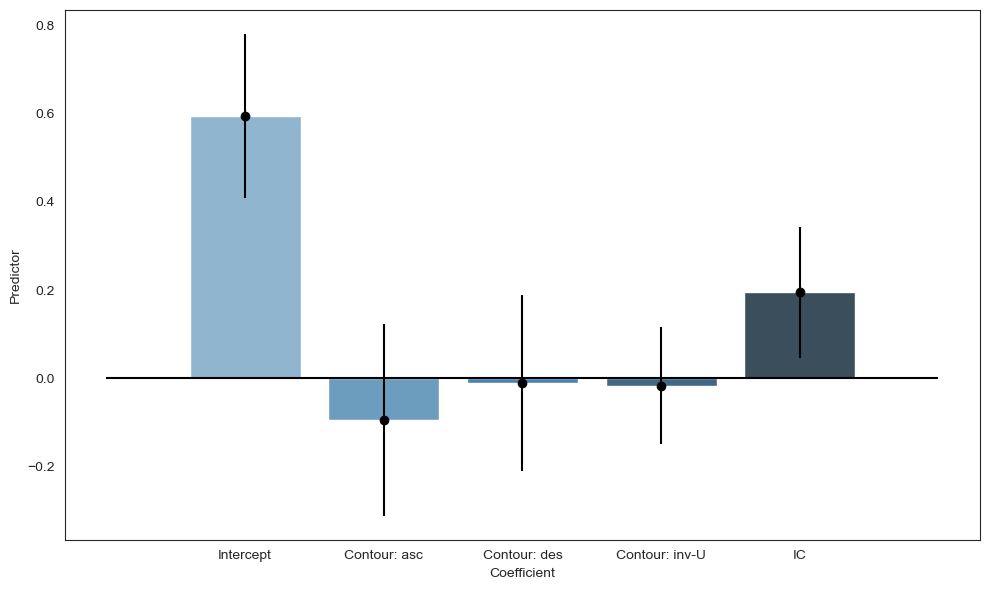

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("white")

# Coefficients and standard errors
coefficients = [0.594, -0.094, -0.010, -0.016, 0.195]
std_errors = [0.186, 0.218, 0.199, 0.133, 0.149]
predictors = ['Intercept', 'Contour: asc', 'Contour: des', 'Contour: inv-U', 'IC']

# Confidence intervals
ci_lower = [coef - 1.96 * se for coef, se in zip(coefficients, std_errors)]
ci_upper = [coef + 1.96 * se for coef, se in zip(coefficients, std_errors)]

# Create DataFrame for plotting
data = pd.DataFrame({
    'Predictor': predictors,
    'Coefficient': coefficients,
    'Std. Error': std_errors,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Predictor', y='Coefficient', data=data, palette="Blues_d")
plt.errorbar(x=data['Predictor'], y=data['Coefficient'], yerr=data['Std. Error'], fmt='o', color='black')
#plt.title('Forest Plot of Mixed Linear Model Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Predictor')
plt.hlines(0, -1, 5, color = 'black')
plt.tight_layout()
plt.show()


### Mixed effects model for IC forced choice

In [10]:
#considering only the effect of accent
md_IC = smf.mixedlm("high_IC_chosen ~ accent", fc_IC_regression, groups=fc_IC_regression['subject'] )
mdf_IC = md_IC.fit(method=["lbfgs"])
print(mdf_IC.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: high_IC_chosen
No. Observations: 64      Method:             REML          
No. Groups:       4       Scale:              0.2381        
Min. group size:  16      Log-Likelihood:     -47.1149      
Max. group size:  16      Converged:          Yes           
Mean group size:  16.0                                      
--------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
--------------------------------------------------------------
Intercept   0.531      0.089   5.988   0.000    0.357    0.705
accent      0.156      0.122   1.281   0.200   -0.083    0.395
Group Var   0.002      0.028                                  



/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [11]:
md_IC = smf.mixedlm("high_IC_chosen ~ accent + C(musician) + accent:C(musician)", fc_IC_regression, groups=fc_IC_regression['subject'] )
mdf_IC = md_IC.fit(method=["lbfgs"])
print(mdf_IC.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: high_IC_chosen
No. Observations: 64      Method:             REML          
No. Groups:       4       Scale:              0.2381        
Min. group size:  16      Log-Likelihood:     -47.1149      
Max. group size:  16      Converged:          Yes           
Mean group size:  16.0                                      
--------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
--------------------------------------------------------------
Intercept   0.531      0.089   5.988   0.000    0.357    0.705
accent      0.156      0.122   1.281   0.200   -0.083    0.395
Group Var   0.002      0.028                                  



/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/cindyzhang/anaconda3/envs/musicIC2/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### Example below

In [108]:

data = sm.datasets.get_rdataset("dietox", "geepack").data
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


In [118]:

# Assuming 'data' is your DataFrame
data['Group'] = data['Pig'].astype(str) + '_' + data['Cu'].astype(str)

# Now fit the model
md = smf.mixedlm("Weight ~ Time", data, groups='Group')
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.395    2.149                            

